<a href="https://colab.research.google.com/github/yedisantonal/korelasi_nilaiUjian_PelanggaranSiswa/blob/main/korr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
from scipy.stats import pearsonr, spearmanr, kendalltau

In [2]:
df = pd.read_csv('/content/data_sd_banten.csv', on_bad_lines='skip', delimiter=";")
df

,No.,Nama Sekolah,Alamat Sekolah,Kecamatan,Status Akreditasi Sekolah,Waktu,Gugus,Melaksanakan MBS,Kurikulum Yang,Jumlah Siswa Per Jenis Kelamin - L,...,Nilai Ujian - Pend. Agama,Nilai Ujian - PKn,Nilai Ujian - IPS,Nilai Ujian - Seni Budaya,Nilai Ujian - Penjaskes,Nilai Ujian - Bhs. Inggris,Nilai Ujian - Mulok,Siswa Tidak Mampu - L,Siswa Tidak Mampu - P,Jumlah Siswa Tidak Mampu
0,1,SD NEGERI 40 LUMPANGANG,GALLEA,Pa'jukukang,B,Pagi,Inti,Ya,KTSP,165,...,8,7,7,7,7,NaN,8,NaN,NaN,-
1,2,SD NEGERI 41 RAPPOA,PINANG RAYA,Pa'jukukang,B,Pagi,Imbas,Ya,KTSP,79,...,8,7,7,9,8,0,8,74.0,50.0,124
2,3,SD NEGERI 42 BATEBALLA,BATEBALLA,Pa'jukukang,B,Pagi,Imbas,Ya,KTSP,54,...,"8,4","8,7","8,8","8,3","8,2",NaN,"8,6",54.0,63.0,117
3,4,SD NEGERI 43 BIANGLOE,PARANGMULOROA,Pa'jukukang,B,Pagi,Imbas,Ya,KTSP,42,...,7,7,7,7,7,NaN,7,40.0,43.0,83
4,5,SD NEGERI 52 KORONGBATU,KORONGBATU,Pa'jukukang,B,Pagi,Imbas,Ya,KTSP,133,...,"7,61","7,59","7,23","8,45","8,55","7,62","7,77",108.0,113.0,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,SD INPRES BORONG KAPALA,KP. KARAMPUNG BELLA,Tompobulu,B,Pagi,Imbas,Ya,KTSP,54,...,"8,25","7,38","8,17","7,33","8,25",NaN,"8,23",29.0,23.0,52
145,146,SD INPRES JATIA,JATIA,Tompobulu,B,Pagi,Inti,Ya,KTSP,85,...,"8,26","8,22","8,45","9,22","9,18",NaN,"9,22",60.0,46.0,106
146,147,SD INPRES KASSI LOE,KASSI LOE,Tompobulu,C,Pagi,Imbas,Ya,2013,59,...,"7,78","6,93","6,8","6,93","7,05",NaN,"7,64",27.0,23.0,50
147,148,SD INPRES TALLE,TALLE,Tompobulu,C,Pagi,Imbas,Ya,KTSP,28,...,"8,07","7,77","8,15","7,4","7,8",NaN,"7,9",28.0,20.0,48


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No.                                 149 non-null    int64  
 1   Nama Sekolah                        149 non-null    object 
 2   Alamat Sekolah                      149 non-null    object 
 3   Kecamatan                           149 non-null    object 
 4   Status Akreditasi Sekolah           149 non-null    object 
 5    Waktu                              149 non-null    object 
 6   Gugus                               149 non-null    object 
 7   Melaksanakan MBS                    149 non-null    object 
 8   Kurikulum Yang                      149 non-null    object 
 9   Jumlah Siswa Per Jenis Kelamin - L  149 non-null    int64  
 10  Jumlah Siswa Per Jenis Kelamin - P  149 non-null    int64  
 11  Agama Siswa - Islam                 149 non-n

In [4]:
df.isnull().sum()

,0
No.,0
Nama Sekolah,0
Alamat Sekolah,0
Kecamatan,0
Status Akreditasi Sekolah,0
Waktu,0
Gugus,0
Melaksanakan MBS,0
Kurikulum Yang,0
Jumlah Siswa Per Jenis Kelamin - L,0


In [5]:
df.columns

Index(['No. ', 'Nama Sekolah', 'Alamat Sekolah', 'Kecamatan',
       'Status Akreditasi Sekolah', ' Waktu ', 'Gugus', 'Melaksanakan MBS',
       'Kurikulum Yang', 'Jumlah Siswa Per Jenis Kelamin - L',
       'Jumlah Siswa Per Jenis Kelamin - P', 'Agama Siswa - Islam',
       'Siswa Mengulang - L', 'Siswa Mengulang - P',
       ' Jumlah Siswa Mengulang  ', 'Jumlah Siswa Putus Sekolah - L',
       'Jumlah Siswa Putus Sekolah - P', 'Jumlah Rombongan Belajar ',
       'Peserta Ujian Akhir Sekolah', 'Jumlah Lulusan Sekolah',
       'Nilai Ujian - Bhs. Indo', 'Nilai Ujian - Matematika',
       'Nilai Ujian - IPA', 'Nilai Ujian - Pend. Agama', 'Nilai Ujian - PKn',
       'Nilai Ujian - IPS', 'Nilai Ujian - Seni Budaya',
       'Nilai Ujian - Penjaskes', 'Nilai Ujian - Bhs. Inggris',
       'Nilai Ujian - Mulok', 'Siswa Tidak Mampu - L', 'Siswa Tidak Mampu - P',
       'Jumlah Siswa Tidak Mampu'],
      dtype='object')

In [6]:
# Tampilkan nilai yang gagal dikonversi
for col in df.iloc[:, 21:30]:
    print(df[col].loc[df[col].apply(lambda x: isinstance(x, str) and not x.replace(',', '').replace('.', '').isdigit())])

df.iloc[:, 21:30] = df.iloc[:, 21:30].applymap(lambda x: x if isinstance(x, (int, float)) or x.replace(',', '').replace('.', '').isdigit() else None)

# Ganti NaN dengan 0 jika perlu
df.iloc[:, 21:30] = df.iloc[:, 21:30].fillna(0)

# Ganti koma dengan titik (jika ada)
df.iloc[:, 21:30] = df.iloc[:, 21:30].replace(',', '.', regex=True)

# Konversi semua kolom ke numeric
for col in df.iloc[:, 21:30]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ganti NaN dengan 0
df.iloc[:, 21:30] = df.iloc[:, 21:30].fillna(0)

# Konversi ke float
df.iloc[:, 21:30] = df.iloc[:, 21:30].astype(float)

# Konversi ke integer
df.iloc[:, 21:30] = df.iloc[:, 21:30].astype(int)

print(df.iloc[:, 21:30].dtypes)

Series([], Name: Nilai Ujian - Matematika, dtype: object)
Series([], Name: Nilai Ujian - IPA, dtype: object)
Series([], Name: Nilai Ujian - Pend. Agama, dtype: object)
Series([], Name: Nilai Ujian - PKn, dtype: object)
Series([], Name: Nilai Ujian - IPS, dtype: object)
47     y               
Name: Nilai Ujian - Seni Budaya, dtype: object
Series([], Name: Nilai Ujian - Penjaskes, dtype: object)
20     - 
21     - 
22     - 
23     - 
25     - 
26     - 
27     - 
28     - 
29     - 
30     - 
Name: Nilai Ujian - Bhs. Inggris, dtype: object
Series([], Name: Nilai Ujian - Mulok, dtype: object)
Nilai Ujian - Matematika      float64
Nilai Ujian - IPA             float64
Nilai Ujian - Pend. Agama     float64
Nilai Ujian - PKn             float64
Nilai Ujian - IPS             float64
Nilai Ujian - Seni Budaya     float64
Nilai Ujian - Penjaskes       float64
Nilai Ujian - Bhs. Inggris    float64
Nilai Ujian - Mulok           float64
dtype: object


<ipython-input-6-1f5bd146a86f>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 21:30] = df.iloc[:, 21:30].applymap(lambda x: x if isinstance(x, (int, float)) or x.replace(',', '').replace('.', '').isdigit() else None)


In [7]:
for col in df.iloc[:, 21:30]:
    stat, p = shapiro(df[col])
    print(f"Kolom: {col} | Statistik: {stat:.3f}, P-Value: {p:.3f}")
    if p > 0.05:
        print("   Data berdistribusi normal\n")
    else:
        print("   Data tidak berdistribusi normal\n")

Kolom: Nilai Ujian - Matematika | Statistik: 0.801, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - IPA | Statistik: 0.733, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - Pend. Agama | Statistik: 0.563, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - PKn | Statistik: 0.547, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - IPS | Statistik: 0.580, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - Seni Budaya | Statistik: 0.618, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - Penjaskes | Statistik: 0.064, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - Bhs. Inggris | Statistik: 0.564, P-Value: 0.000
   Data tidak berdistribusi normal

Kolom: Nilai Ujian - Mulok | Statistik: 0.604, P-Value: 0.000
   Data tidak berdistribusi normal



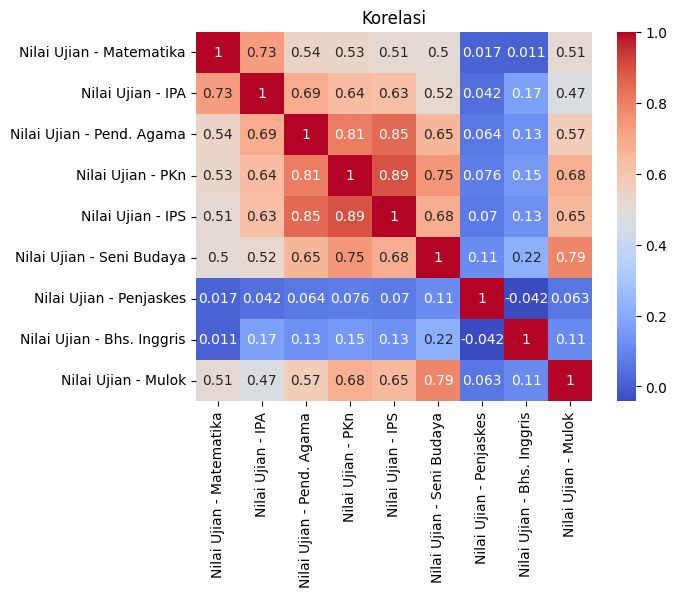

In [8]:
dff_cor = df.iloc[:, 21:30].corr()
sns.heatmap(dff_cor, annot=True, cmap='coolwarm')
plt.title('Korelasi')
plt.show()

In [9]:
columns = df.iloc[:, 21:30].columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1, col2 = columns[i], columns[j]

        # Pearson Correlation
        pearson_corr, pearson_p = pearsonr(df[col1], df[col2])

        # Spearman Rank Correlation
        spearman_corr, spearman_p = spearmanr(df[col1], df[col2])

        # Kendall's Tau Correlation
        kendall_corr, kendall_p = kendalltau(df[col1], df[col2])

        print(f"Korelasi antara {col1} dan {col2}:")
        print(f"  Pearson   : {pearson_corr:.3f} (p-value={pearson_p:.3f})")
        print(f"  Spearman  : {spearman_corr:.3f} (p-value={spearman_p:.3f})")
        print(f"  Kendall's : {kendall_corr:.3f} (p-value={kendall_p:.3f})\n")

Korelasi antara Nilai Ujian - Matematika dan Nilai Ujian - IPA:
  Pearson   : 0.730 (p-value=0.000)
  Spearman  : 0.430 (p-value=0.000)
  Kendall's : 0.369 (p-value=0.000)

Korelasi antara Nilai Ujian - Matematika dan Nilai Ujian - Pend. Agama:
  Pearson   : 0.540 (p-value=0.000)
  Spearman  : 0.237 (p-value=0.004)
  Kendall's : 0.203 (p-value=0.004)

Korelasi antara Nilai Ujian - Matematika dan Nilai Ujian - PKn:
  Pearson   : 0.534 (p-value=0.000)
  Spearman  : 0.207 (p-value=0.011)
  Kendall's : 0.178 (p-value=0.011)

Korelasi antara Nilai Ujian - Matematika dan Nilai Ujian - IPS:
  Pearson   : 0.510 (p-value=0.000)
  Spearman  : 0.262 (p-value=0.001)
  Kendall's : 0.222 (p-value=0.001)

Korelasi antara Nilai Ujian - Matematika dan Nilai Ujian - Seni Budaya:
  Pearson   : 0.501 (p-value=0.000)
  Spearman  : 0.352 (p-value=0.000)
  Kendall's : 0.301 (p-value=0.000)

Korelasi antara Nilai Ujian - Matematika dan Nilai Ujian - Penjaskes:
  Pearson   : 0.017 (p-value=0.839)
  Spearman  :